# Regresión Lineal OLS

OLS (Ordinary Least Squares) es un método de estimación utilizado en la regresión lineal para encontrar los coeficientes que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los predichos. En otras palabras, OLS busca la "línea de mejor ajuste" a través de los datos, minimizando la suma de los cuadrados de las diferencias verticales entre los valores observados y los predichos.

En el contexto de la regresión lineal, el modelo OLS puede expresarse matemáticamente de la siguiente manera para un conjunto de datos con $n$ observaciones y $p$ variables predictoras:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \varepsilon
$$

Donde:

- $Y$ es la variable dependiente.
- $X_1, X_2, \ldots, X_p$ son las variables predictoras.
- $\beta_0, \beta_1, \ldots, \beta_p$ son los coeficientes a estimar.
- $\varepsilon$ es el término de error.

El método OLS busca encontrar los valores de  $\beta_0, \beta_1, \ldots, \beta_p$ que minimizan la función de costo, que es la suma de los cuadrados de las diferencias entre los valores observados y los predichos:

$\text{Minimizar} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}))^2$

En este contexto, OLS utiliza técnicas matriciales para encontrar una solución analítica para los coeficientes que minimizan la suma de los cuadrados de las diferencias. Este método es conocido como "mínimos cuadrados ordinarios" porque minimiza la suma de los cuadrados de los residuos.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Regresión/hormigon.csv")

In [4]:
descripcion = data.describe(include = "all").T
print(descripcion)

               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992

In [5]:
descripcion["Nulos"] = data.isnull().sum()
descripcion["Tipos"] = data.dtypes

In [6]:
descripcion.head(len(data))

,count,mean,std,min,25%,50%,75%,max,Nulos,Tipos
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,0,float64
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,0,float64
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,0,float64
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,0,float64
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,0,float64
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,0,float64
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,0,float64
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,0,int64
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,0,float64


# Descripción gráfica de los datos

## Diagrama de correlación

In [7]:
data.corr()["strength"]

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
Name: strength, dtype: float64

<Axes: >

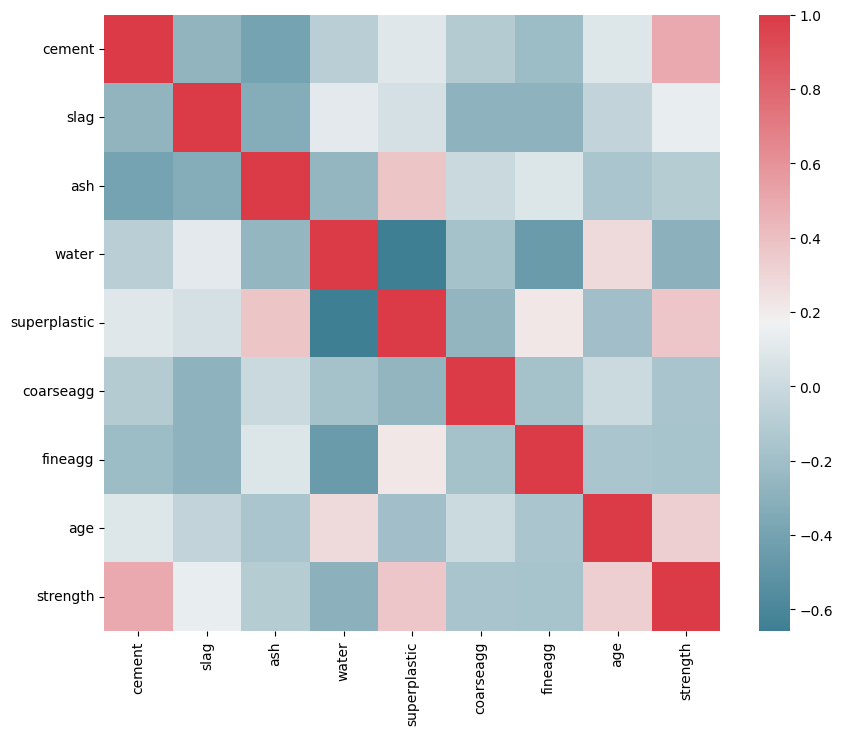

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

El mismo diagrama de correlación pero sólo con los valores bajo la diagonal:

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

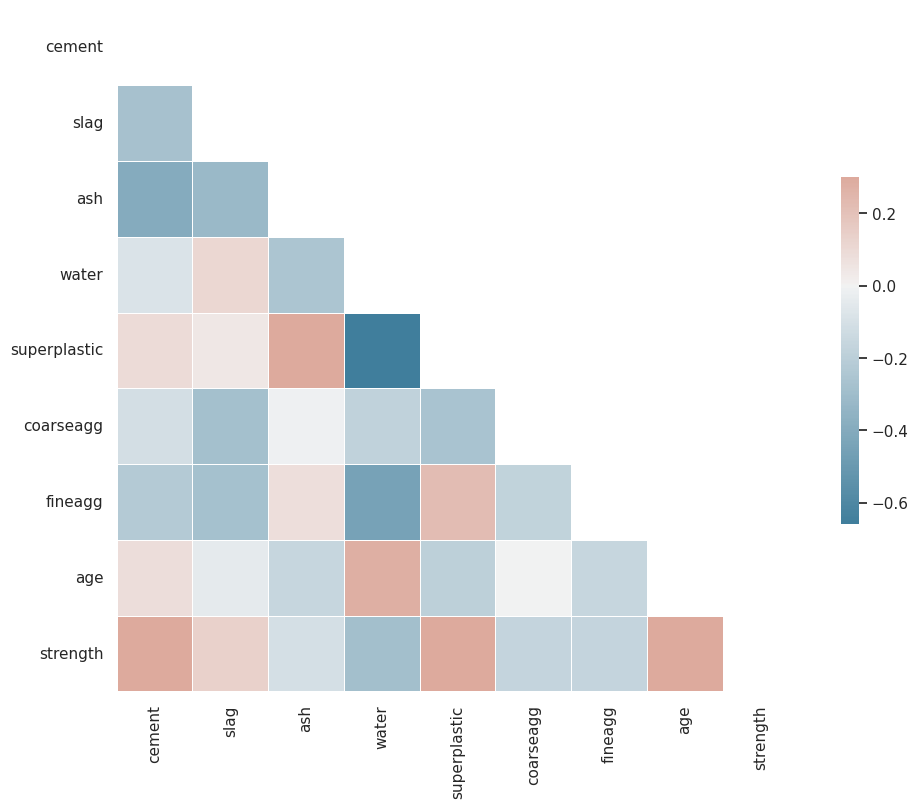

In [9]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Diagramas de pares

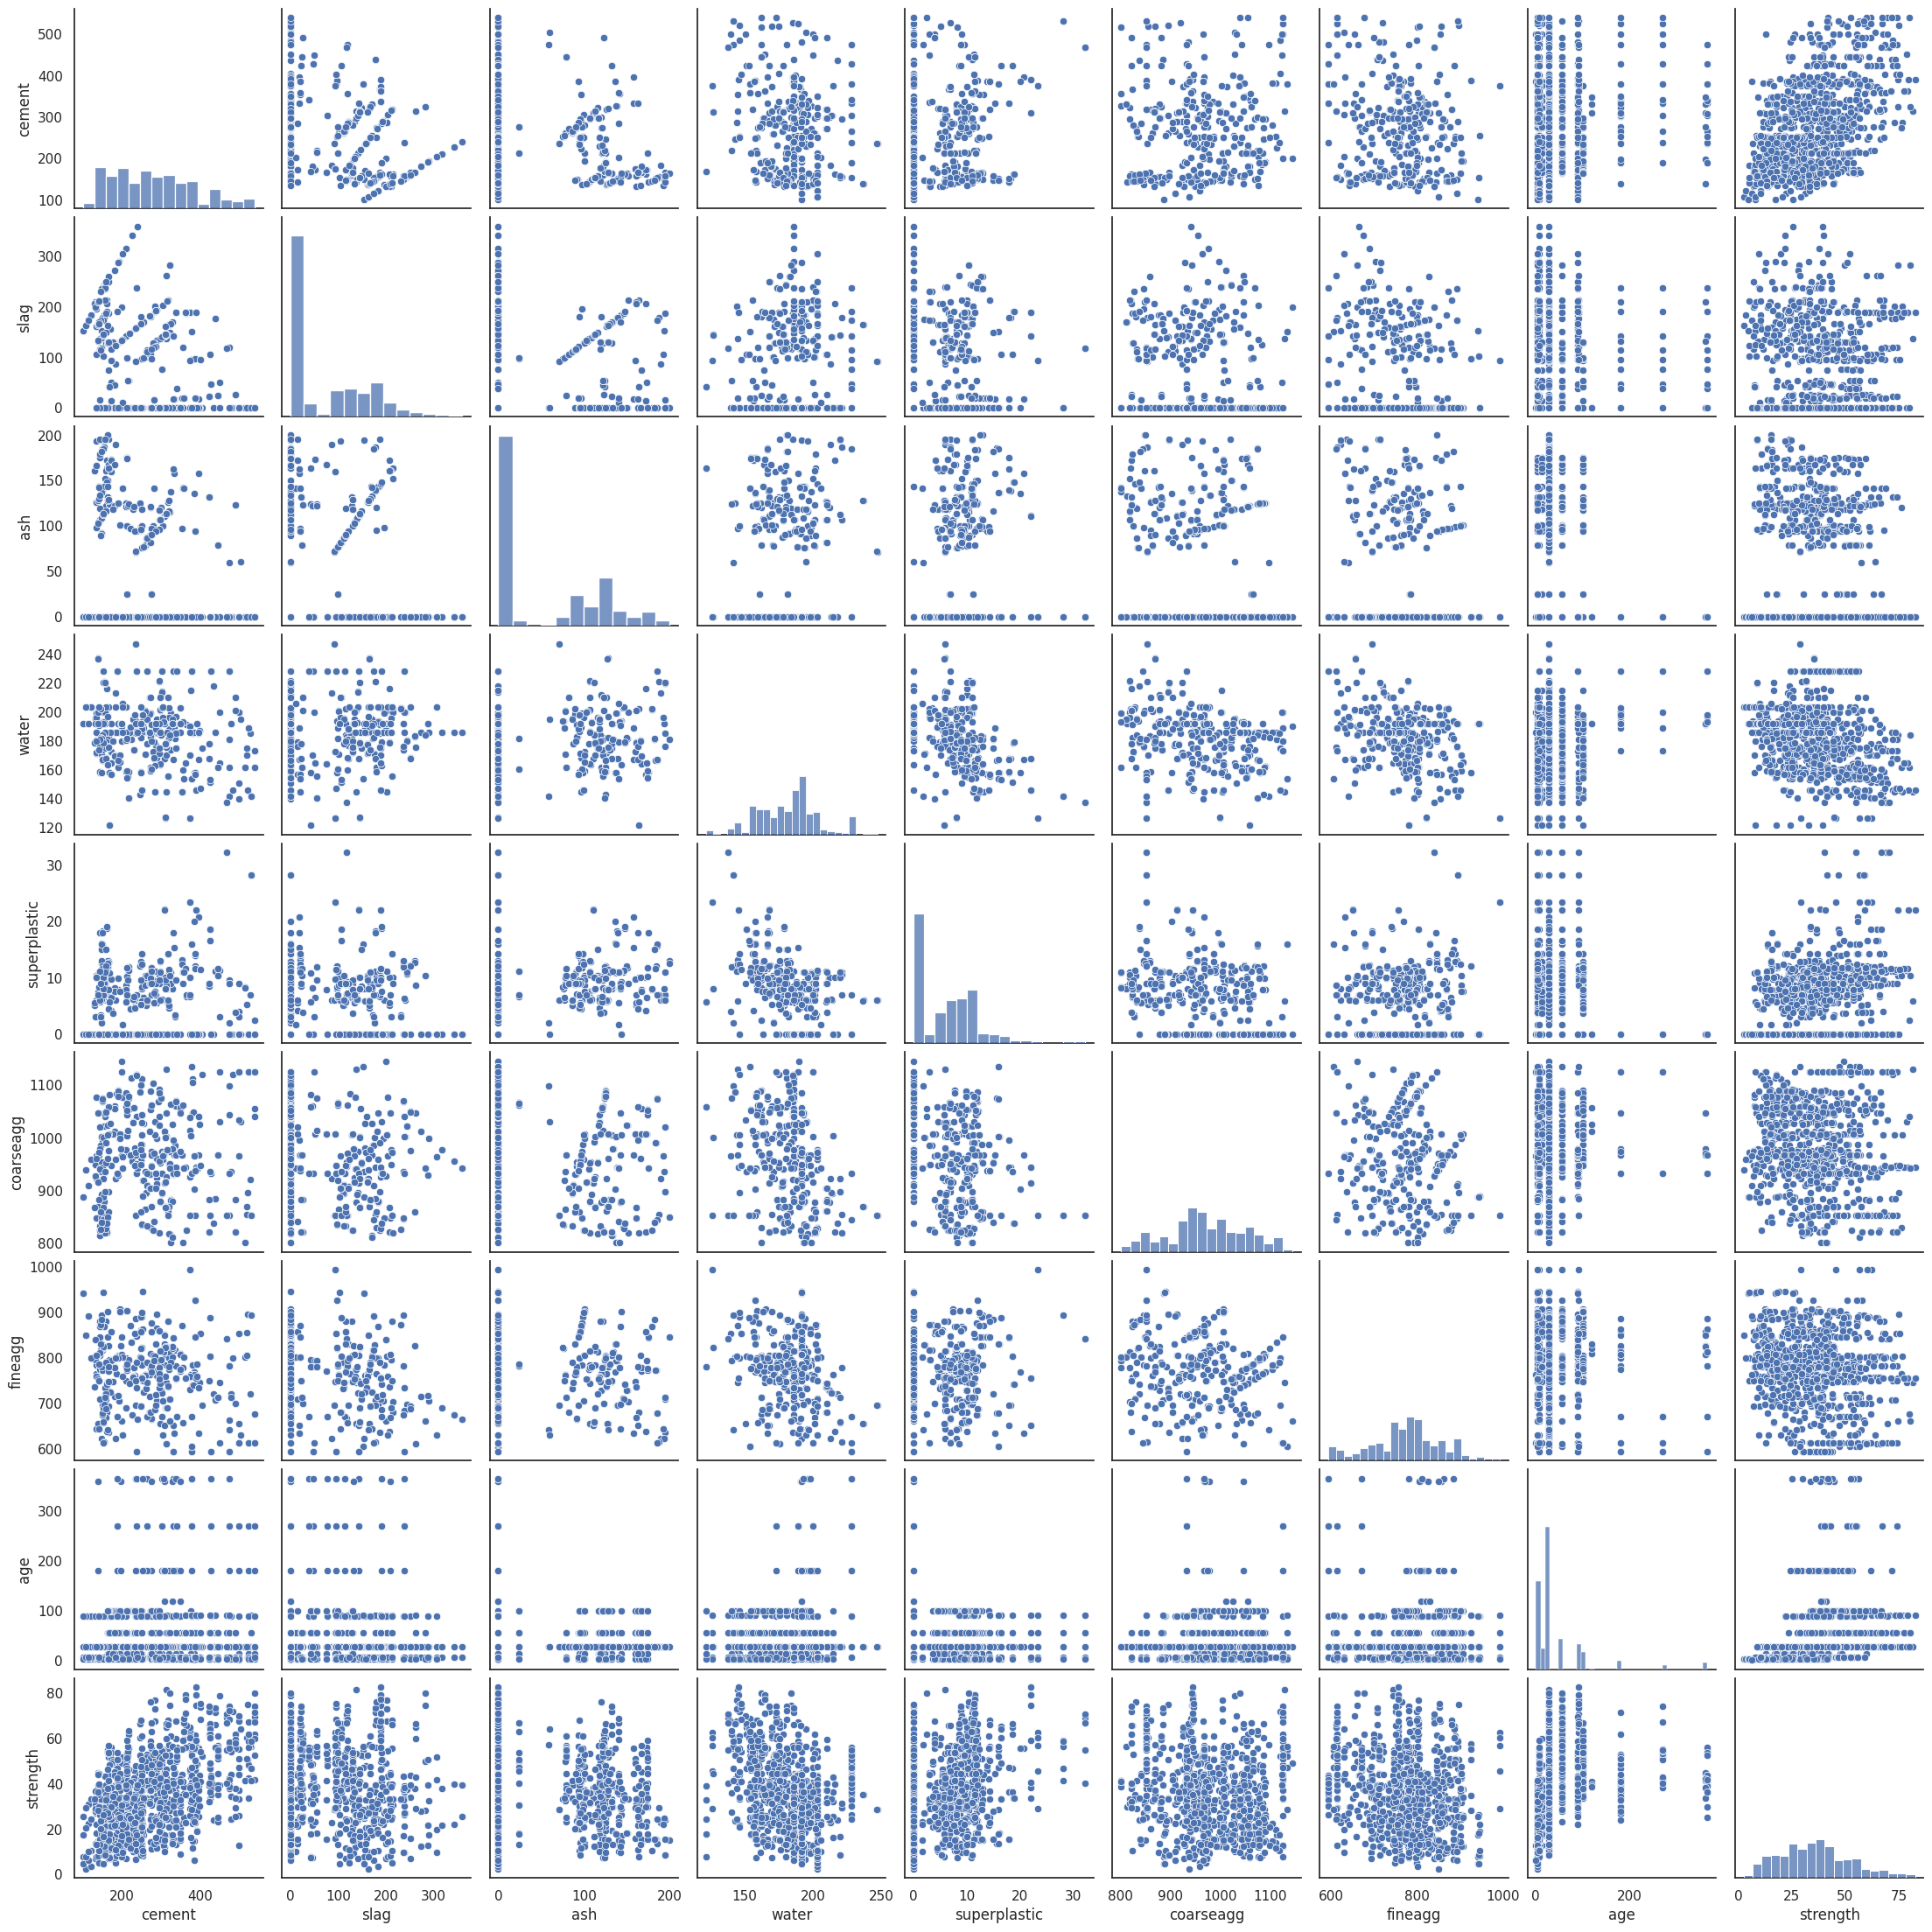

In [10]:
datoscompletos = data.dropna()
sns.pairplot(datoscompletos)

Detalle con tres columnas

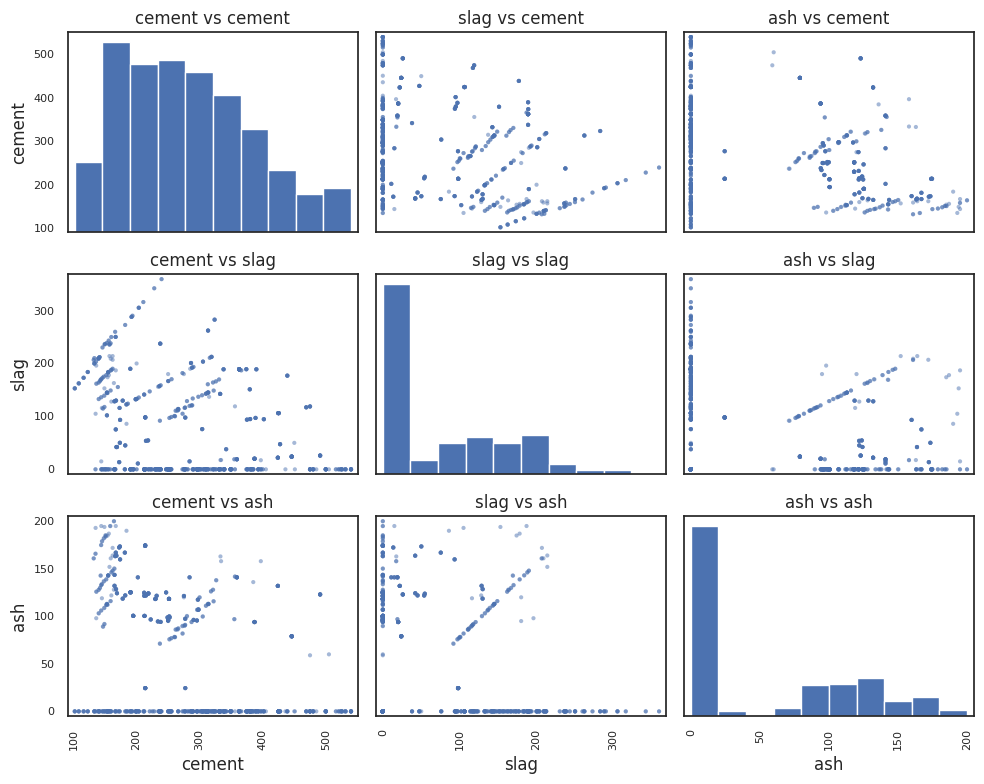

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# create a scatterplot matrix
pd.plotting.scatter_matrix(data[['cement', 'slag', 'ash']], figsize=(10, 8), diagonal='hist')

# add titles to the subplots
for ax in plt.gcf().axes:
    ax.set_title(ax.get_xlabel() + ' vs ' + ax.get_ylabel())

# adjust the layout and spacing between subplots
plt.tight_layout()

# display the plot
plt.show()


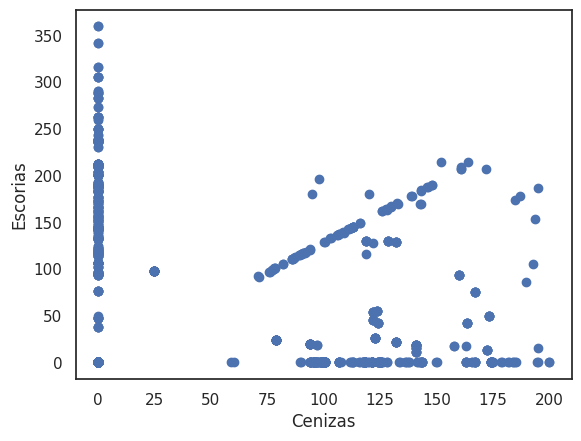

In [12]:
# Representación gráfica de un par de variables

plt.scatter(data["ash"], data['slag'])
plt.xlabel('Cenizas')
plt.ylabel('Escorias')
plt.show()

# Normalización

La siguiente celda de código es opcional. Ejecutarla sólo si se desea utilizar datos normalizados.

Para la regresión lineal NO ES NECESARIA LA NORMALIZACIÓN

En algunos casos, la normalización puede no ser necesaria. Si todas las variables predictoras están en la misma escala o si la escala no afecta significativamente la interpretación y el rendimiento del modelo, entonces normalizar los datos puede ser opcional.

La decisión dependerá de:

1. **Escalas de las variables:** La regresión lineal es sensible a la escala de las variables. Si las variables predictoras (características) están en escalas muy diferentes, el modelo puede dar más peso a las variables con valores más grandes. Normalizar (o estandarizar) los datos puede ayudar a evitar este problema.

2. **Interpretación de coeficientes:** Si la normalización no se realiza y las variables tienen diferentes escalas, la interpretación de los coeficientes del modelo puede volverse más complicada. Los coeficientes representarán el cambio en la variable de respuesta por unidad de cambio en la variable predictor, pero si las variables tienen escalas diferentes, este cambio puede no ser fácil de interpretar.

3. **Convergencia del algoritmo:** Algunos algoritmos de optimización utilizados en la regresión lineal pueden converger más rápidamente si los datos están normalizados. Esto es particularmente importante en algoritmos basados en el descenso de gradiente.


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

from sklearn.model_selection import train_test_split
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Si no se desea usar datos normalizados ejecutar esta celda para recuperar los originales

In [14]:
datos_normalizados = data.copy()

In [15]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Regresión Lineal OLS

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Agregar constante al conjunto de entrenamiento (intercepto)
X_train = sm.add_constant(X_train)

# Crear el modelo OLS y ajustarlo
model = sm.OLS(y_train, X_train).fit()

# Imprimir el resumen del modelo
print(model.summary())

# Hacer predicciones en el conjunto de prueba
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.47e-155
Time:                        12:04:26   Log-Likelihood:                -723.89
No. Observations:                 772   AIC:                             1466.
Df Residuals:                     763   BIC:                             1508.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0101      0.022      0.451   